In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img 
from keras.models import Sequential 
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D 
import os
import pandas as pd
import numpy as np

In [2]:
TRAIN_DIR ='images/train'
TEST_DIR= 'images/test'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir, label)): 
            image_paths.append(os.path.join(dir, label, imagename)) 
            labels.append(label)
        print(label, "completed") 
    return image_paths, labels

In [4]:
train= pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [6]:
test= pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]


In [8]:
from tqdm.notebook import tqdm

In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img=load_img(image,color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    features=np.array(features)
    features=features.reshape(len(features),48,48,1)
    return features

In [10]:
train_features= extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [11]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [12]:
x_train= train_features/255.0
x_test = test_features/255.0

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [15]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [16]:
y_train = to_categorical(y_train,num_classes=7)
y_test = to_categorical(y_test,num_classes = 7)

In [17]:
model = Sequential()
#convolutional Layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
#fully connected Layers
model.add(Dense (512, activation= 'relu'))
model.add(Dropout(0.4))
model.add(Dense (256, activation ='relu'))
model.add(Dropout(0.3)) 
#output Layer
model.add(Dense(7, activation='softmax'))

C:\Users\SOUMAJIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [19]:
model.fit(x= x_train,y=y_train, batch_size = 128, epochs= 100, validation_data = (x_test,y_test))

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 329s 1s/step - accuracy: 0.2333 - loss: 1.8468 - val_accuracy: 0.2583 - val_loss: 1.8091
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 336s 1s/step - accuracy: 0.2509 - loss: 1.8054 - val_accuracy: 0.3020 - val_loss: 1.7055
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 322s 1s/step - accuracy: 0.3081 - loss: 1.7067 - val_accuracy: 0.3936 - val_loss: 1.5259
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 319s 1s/step - accuracy: 0.3832 - loss: 1.5631 - val_accuracy: 0.4418 - val_loss: 1.4394
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 321s 1s/step - accuracy: 0.4250 - loss: 1.4787 - val_accuracy: 0.4922 - val_loss: 1.3219
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 325s 1s/step - accuracy: 0.4566 - loss: 1.4026 - val_accuracy: 0.5102 - val_loss: 1.2841
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 390s 1s/step - accuracy: 0.4729 - loss: 1.3754 - val_accuracy: 0.5192 - val_loss: 1.2483
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 344s 2s/step - accuracy: 0.4830 - loss: 1.3448 - 

In [20]:
model_json=model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [21]:
from keras.models import model_from_json

In [22]:
json_file = open("emotiondetector.json","r")
model_json=json_file.read()
json_file.close()
model=model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [23]:
label=['angry','disgust','fear','happy','neutral','sad','surprise']

In [26]:
def ef(image):
    img=load_img(image,color_mode = "grayscale")
    feature=np.array(img)
    feature= feature.reshape(1,48,48,1)
    return feature/255.0

In [27]:
image='images/train/angry/22.jpg'
print("Original image is of angry")
img=ef(image)
pred=model.predict(img)
pred_label=label[pred.argmax()]
print("Model prediction is ",pred_label)

Original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Model prediction is  angry


In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

Original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Model prediction is  sad


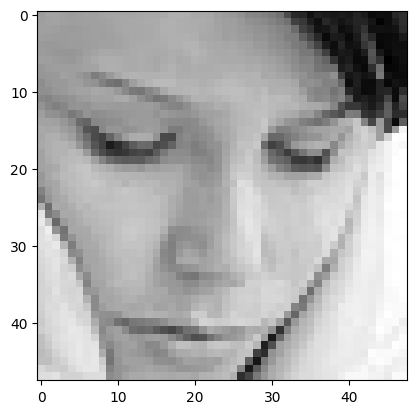

In [29]:
image='images/train/sad/42.jpg'
print("Original image is of sad")
img=ef(image)
pred=model.predict(img)
pred_label=label[pred.argmax()]
print("Model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

Original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Model prediction is  angry


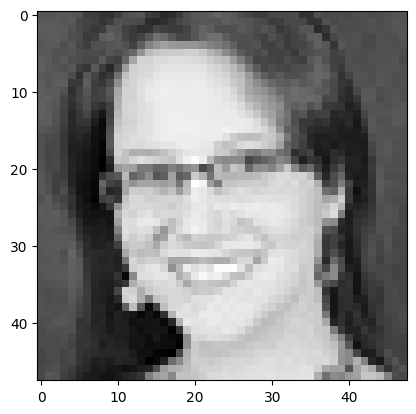

In [31]:
image='images/train/happy/7.jpg'
print("Original image is of happy")
img=ef(image)
pred=model.predict(img)
pred_label=label[pred.argmax()]
print("Model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')